In [1]:
import torch
torch.cuda.is_available()

True

In [2]:
import fastai
fastai.__version__

'2.7.19'

In [3]:
torch.__version__

'2.6.0+cu124'

In [4]:
#Kutub xonalar
from fastai.vision.all import *
from ipywidgets import widgets

#Data
path = untar_data(URLs.PETS)/'images'

#lebellovchi funksiya
def is_cat(x): return x[0].isupper()

#Datalarni yuklovchi (Data  loaders)
dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid_pct=0.2, seed=42,
    label_func=is_cat, item_tfms=Resize(224)
)
#O'qitish(Train)
learn = cnn_learner(dls, resnet34, metrics=accuracy)
learn.fine_tune(2)

/usr/local/lib/python3.11/dist-packages/fastai/vision/learner.py:303: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 124MB/s]


epoch,train_loss,valid_loss,accuracy,time
0,0.176380,0.024729,0.993234,00:43


epoch,train_loss,valid_loss,accuracy,time
0,0.073884,0.034938,0.989175,00:45
1,0.030400,0.011467,0.995264,00:44


In [5]:
uoload = widgets.FileUpload()
uoload

FileUpload(value={}, description='Upload')

Mushikmi: False
Ehtimollik: 0.000


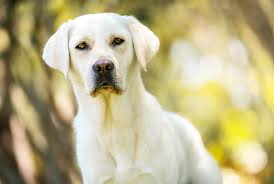

In [8]:
img = PILImage.create(uoload.data[-1])
pred, _, prob = learn.predict(img)
print(f"Mushikmi: {pred}")
print(f"Ehtimollik: {prob[1].item():.3f}")
img